In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#Training & Testing Spliting
training_set = train_datagen.flow_from_directory(r'dataset/train',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')


Found 1400 images belonging to 7 classes.


In [13]:
test_set = train_datagen.flow_from_directory(r'dataset/validation',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 420 images belonging to 7 classes.


In [14]:
inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [15]:
for layer in inception_v3.layers[: -15]:
    layer.trainable = False

In [16]:
x = inception_v3.output
x = Flatten()(x)

x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(units=7, activation='softmax')(x)
model = Model(inception_v3.input, output)

#model.summary()

In [17]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [18]:
histry = model.fit(training_set,
                            validation_data=test_set,
                            epochs=100,
                            steps_per_epoch=len(training_set),
                            validation_steps=len(test_set),
                            )

Epoch 1/100


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 513s 10s/step - accuracy: 0.1977 - loss: 10.4728 - val_accuracy: 0.3310 - val_loss: 1.7175
Epoch 2/100


C:\Users\admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 343s 8s/step - accuracy: 0.2984 - loss: 1.8251 - val_accuracy: 0.3952 - val_loss: 1.5181
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 295s 7s/step - accuracy: 0.3128 - loss: 1.7487 - val_accuracy: 0.4548 - val_loss: 1.3486
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 301s 7s/step - accuracy: 0.3762 - loss: 1.5636 - val_accuracy: 0.5095 - val_loss: 1.2143
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.4251 - loss: 1.4552 - val_accuracy: 0.5048 - val_loss: 1.2884
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
44/44 ━━━━━━━━━━

Epoch 59/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 296s 7s/step - accuracy: 0.8011 - loss: 0.5703 - val_accuracy: 0.9000 - val_loss: 0.3028
Epoch 60/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 61/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 322s 7s/step - accuracy: 0.7983 - loss: 0.5746 - val_accuracy: 0.8905 - val_loss: 0.3099
Epoch 62/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 63/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 332s 8s/step - accuracy: 0.7671 - loss: 0.5874 - val_accuracy: 0.8738 - val_loss: 0.3678
Epoch 64/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 65/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 310s 7s/step - accuracy: 0.7771 - loss: 0.6092 - val_accuracy: 0.8833 - val_loss: 0.3136
Epoch 66/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 67/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 298s 7s/step - accuracy: 0.8224 - loss: 0.5126 - val_accuracy: 0.91

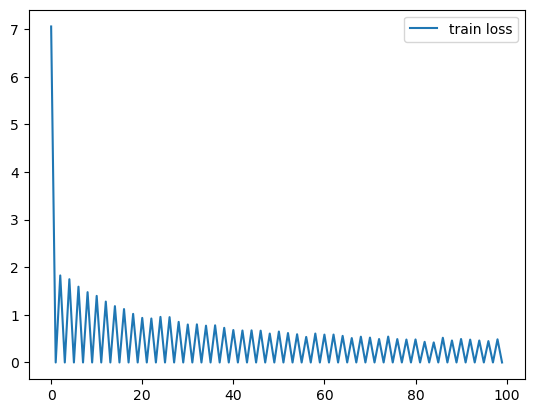

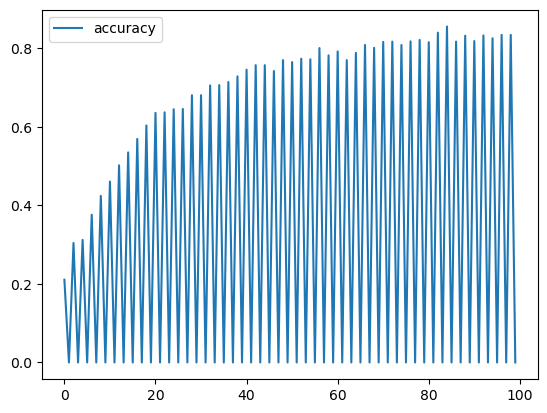

In [19]:
plt.plot(histry.history['loss'], label='train loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(histry.history['accuracy'], label='accuracy')
plt.legend()
plt.show()


model.save('model1.h5')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
y_true = test_set.classes  # Actual labels
y_pred = np.argmax(model.predict(test_set), axis=1)  # Predicted labels

# Get class names
class_labels = list(test_set.class_indices.keys())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

# Print overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
